In [1]:
!pip install geopandas sqlalchemy psycopg2-binary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.4 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!ls /content/drive/MyDrive/airbnb_ny_analytics/
# Should show: listings.csv.gz  reviews.csv.gz

listings.csv.gz  reviews.csv.gz


In [4]:
import pandas as pd

df = pd.read_csv("/content/drive/MyDrive/airbnb_ny_analytics/listings.csv.gz", compression='gzip')
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df = df[(df['price'] > 10) & (df['price'] < 2000)]
print(df.head())
print(df['price'].describe())

<>:4: SyntaxWarning: invalid escape sequence '\$'
<>:4: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-2012820973.py:4: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


     id                        listing_url       scrape_id last_scraped  \
0  2539  https://www.airbnb.com/rooms/2539  20250617032754   2025-06-17   
1  2595  https://www.airbnb.com/rooms/2595  20250617032754   2025-06-17   
2  5136  https://www.airbnb.com/rooms/5136  20250617032754   2025-06-17   
3  6848  https://www.airbnb.com/rooms/6848  20250617032754   2025-06-17   
5  6990  https://www.airbnb.com/rooms/6990  20250617032754   2025-06-17   

        source                                              name  \
0  city scrape  Superfast Wi-Fi.  Clean & quiet home by the park   
1  city scrape          Skylit Midtown Manhattan Spacious Studio   
2  city scrape   Spacious Family Friendly Duplex w/ Patio + Yard   
3  city scrape                  Only 2 stops to Manhattan studio   
5  city scrape                           UES Beautiful Blue Room   

                                         description  \
0  Bright, serene room in a renovated apartment h...   
1  Beautiful, spacious skyli

In [5]:
import sqlite3

conn = sqlite3.connect("airbnb_ny.db")
df.to_sql("listings", conn, if_exists="replace", index=False)

21203

In [7]:
print(df.columns)

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [8]:
query = """
SELECT neighbourhood_group_cleansed AS borough, neighbourhood_cleansed AS neighborhood,
       AVG(price) AS avg_price
FROM listings
GROUP BY neighbourhood_group_cleansed, neighbourhood_cleansed
ORDER BY avg_price DESC
"""
avg_price_df = pd.read_sql(query, conn)
avg_price_df.head(10)

,borough,neighborhood,avg_price
0,Bronx,Riverdale,1042.500000
1,Brooklyn,Navy Yard,622.333333
2,Staten Island,Fort Wadsworth,600.000000
3,Manhattan,Tribeca,533.408163
4,Queens,Holliswood,485.000000
5,Manhattan,SoHo,470.022059
6,Manhattan,Greenwich Village,463.070588
7,Manhattan,Theater District,455.130045
8,Staten Island,Todt Hill,419.250000
9,Manhattan,West Village,411.898678


In [9]:
query = """
SELECT neighbourhood_group_cleansed AS borough, neighbourhood_cleansed AS neighborhood,
       COUNT(*) AS total_listings
FROM listings
GROUP BY neighbourhood_group_cleansed, neighbourhood_cleansed
ORDER BY total_listings DESC
"""
listings_count_df = pd.read_sql(query, conn)
listings_count_df.head(10)

,borough,neighborhood,total_listings
0,Brooklyn,Bedford-Stuyvesant,1360
1,Manhattan,Midtown,1307
2,Manhattan,Hell's Kitchen,976
3,Manhattan,Harlem,954
4,Manhattan,Upper East Side,948
5,Brooklyn,Williamsburg,832
6,Brooklyn,Bushwick,777
7,Manhattan,Upper West Side,771
8,Brooklyn,Crown Heights,653
9,Manhattan,Chelsea,509


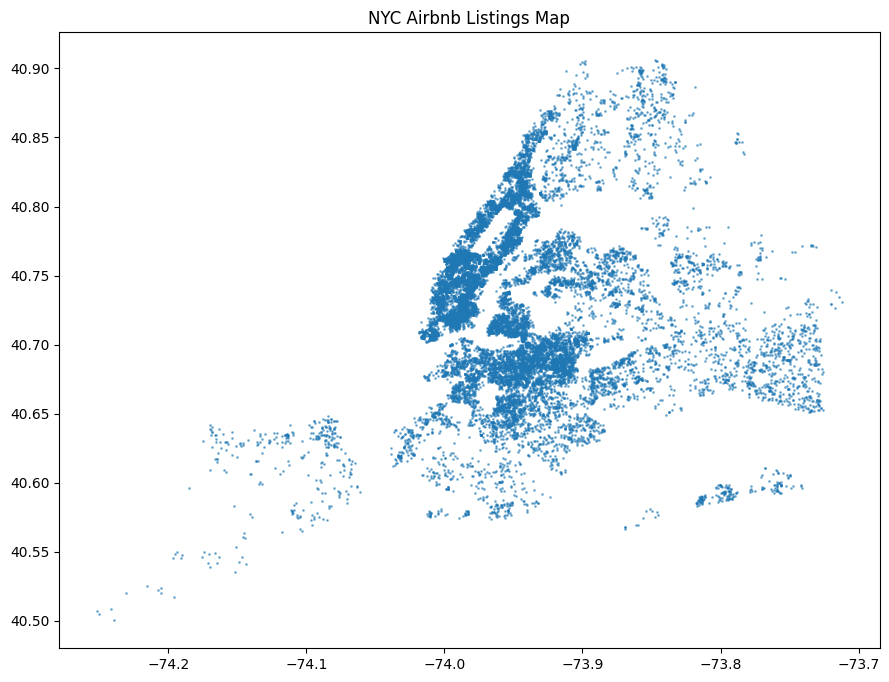

In [10]:
import geopandas as gpd
import matplotlib.pyplot as plt

# GeoDataFrame with latitude & longitude
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df.longitude, df.latitude))

# Plot map of all listings
gdf.plot(figsize=(12,8), markersize=1, alpha=0.5)
plt.title("NYC Airbnb Listings Map")
plt.show()

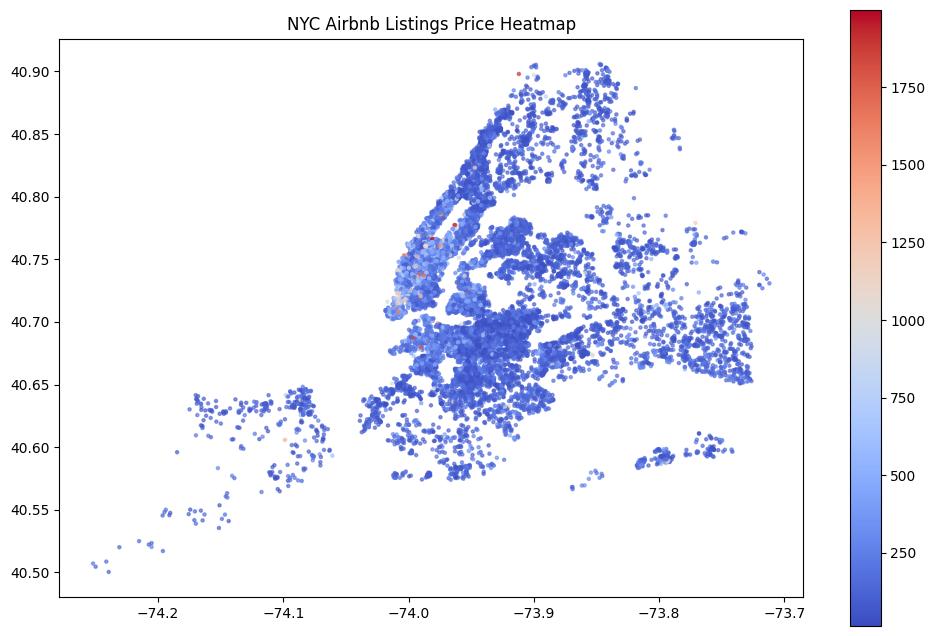

In [11]:
gdf.plot(column='price', cmap='coolwarm', figsize=(12,8), markersize=5, legend=True, alpha=0.6)
plt.title("NYC Airbnb Listings Price Heatmap")
plt.show()

In [15]:
df.to_csv("/content/drive/MyDrive/airbnb_ny_analytics/cleaned_listings_ny.csv", index=False)

In [13]:
import pandas as pd

# Load CSV
df = pd.read_csv("/content/drive/MyDrive/airbnb_ny_analytics/listings.csv.gz", compression='gzip')

# Remove $ and commas, convert to float
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)

# Optional: remove outliers
df = df[(df['price'] > 10) & (df['price'] < 2000)]

# Check cleaned price
print(df['price'].describe())

<>:7: SyntaxWarning: invalid escape sequence '\$'
<>:7: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipython-input-4069616282.py:7: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)


count    21203.000000
mean       214.307975
std        202.909179
min         14.000000
25%         89.000000
50%        151.000000
75%        262.000000
max       1999.000000
Name: price, dtype: float64


In [14]:
df.to_csv("/content/drive/MyDrive/airbnb_ny_analytics/cleaned_listings_ny.csv", index=False)